### Install gensim via: 
`
conda install anaconda::gensim
`
### The following demo code follows: [word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

In [2]:
import random
import tempfile
import numpy as np  
import matplotlib.pyplot as plt

import gensim.models
from gensim import utils
from gensim.test.utils import datapath
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction

In [2]:
# Assume there's one document per line, tokens separated by whitespace
corpus_path = datapath('lee_background.cor')
for ind, line in enumerate(open(corpus_path)):
    print(ind, line[0:100])
    if ind > 10:
        break

0 Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wal
1 Indian security forces have shot dead eight suspected militants in a night-long encounter in souther
2 The national road toll for the Christmas-New Year holiday period stands at 45, eight fewer than for 
3 Argentina's political and economic crisis has deepened with the resignation of its interim President
4 Six midwives have been suspended at Wollongong Hospital, south of Sydney, for inappropriate use of n
5 The Federal Government says it should be safe for Afghani asylum seekers in Australia to return home
6 The United States team of Monica Seles and Jan-Michael Gambill scored a decisive victory over unseed
7 Hundreds of canoeists are enjoying hard-earned New Years Eve celebrations following five days paddli
8 There has been welcome relief for firefighters in New South Wales overnight with milder weather allo
9 Some roads are closed because of dangerous conditions caused by bushfir

### Build corpus

In [1]:
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

### Training word2vec model

In [3]:
# get list of sentences
sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences, vector_size=100, alpha=0.025, window=5, 
                               min_count=5, sample=0.001, seed=1, workers=3, min_alpha=0.0001, 
                               sg=1, negative=5, ns_exponent=0.75, epochs=5, sorted_vocab=1)

In [4]:
vec_king = model.wv['king']
print(vec_king)
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

[-0.09802016  0.20524588  0.07644585  0.03258163  0.03796132 -0.3295941
  0.16295311  0.33973974  0.01203752 -0.04199393 -0.04413418 -0.2599544
  0.02029998  0.11139708  0.01795027  0.05680091 -0.0223315   0.00528657
 -0.04914821 -0.27273905  0.15326102 -0.01450457  0.04251767 -0.01788044
 -0.11535878  0.10328104 -0.01353669 -0.00093236 -0.13575962  0.02132385
  0.1701617  -0.15892032  0.14368334 -0.09243222 -0.06147888  0.21096139
  0.09408836  0.10421204 -0.11711358 -0.09996022 -0.01788591  0.02955885
 -0.06070229 -0.00832878  0.13483472 -0.06877127 -0.12471918  0.02221052
 -0.01278917  0.11790823  0.06674743 -0.1400876  -0.08488248 -0.00366269
 -0.01383721  0.06794824  0.05526713 -0.01664503 -0.10539795 -0.03315234
 -0.09218378 -0.0296066   0.07819366 -0.02922133 -0.05075899  0.31099477
  0.11410116  0.13631158 -0.12396321  0.1199102  -0.05672163 -0.03082982
  0.14857547  0.00271496  0.1261528   0.10841332  0.05499082 -0.12202844
 -0.14986931 -0.05456595 -0.13113211  0.05382773 -0.0

### Storing and loading models

In [8]:
with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    # The model is now safely stored in the filepath.
    # You can copy it to other machines, share it with others, etc.
    # To load a saved model:
    new_model = gensim.models.Word2Vec.load(temporary_filepath)

In [9]:
model = gensim.models.Word2Vec.load(temporary_filepath)
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
     'and', 'continue', 'training', 'it', 'with', 'more', 'sentences'],]
model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)

# cleaning up temporary file
import os
os.remove(temporary_filepath)

### Visualising Word Embeddings using t-SNE

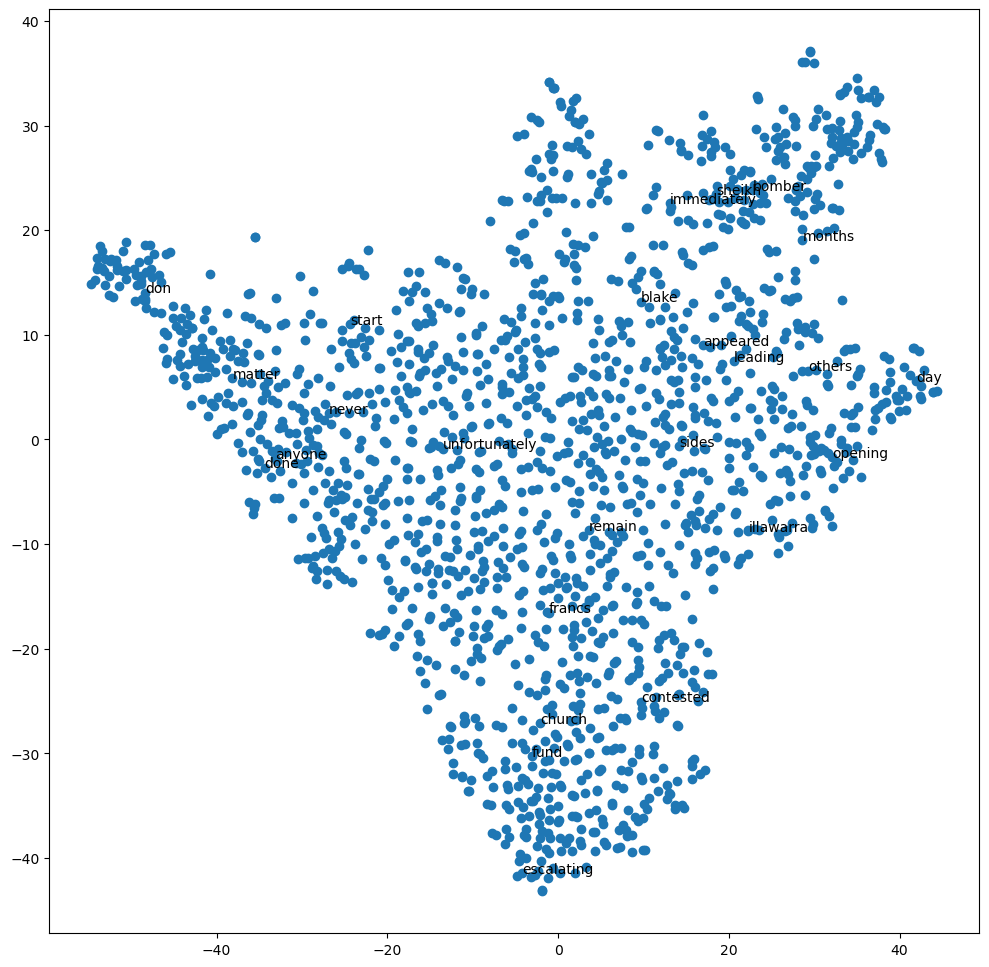

In [11]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)
    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_matplotlib(x_vals, y_vals, labels):
    random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
        
plot_with_matplotlib(x_vals, y_vals, labels)